In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [42]:
#fetching historical data
data = yf.download("SG", start="2023-01-01", end="2024-08-29")
print(data.head())

[*********************100%%**********************]  1 of 1 completed

            Open   High   Low  Close  Adj Close   Volume
Date                                                    
2023-01-03  8.79  9.005  8.49   8.65       8.65  1577200
2023-01-04  8.84  9.310  8.68   9.03       9.03  1474600
2023-01-05  8.87  8.960  8.42   8.50       8.50  1811600
2023-01-06  8.57  8.750  7.81   8.49       8.49  2643100
2023-01-09  8.67  8.820  8.39   8.43       8.43  1495200


In [7]:
#general information on Sweet Greens stock
print(data.info)

<bound method DataFrame.info of              Open    High     Low  Close  Adj Close   Volume
Date                                                        
2023-01-03   8.79   9.005   8.490   8.65       8.65  1577200
2023-01-04   8.84   9.310   8.680   9.03       9.03  1474600
2023-01-05   8.87   8.960   8.420   8.50       8.50  1811600
2023-01-06   8.57   8.750   7.810   8.49       8.49  2643100
2023-01-09   8.67   8.820   8.390   8.43       8.43  1495200
...           ...     ...     ...    ...        ...      ...
2023-12-22  11.43  11.640  11.380  11.52      11.52   968900
2023-12-26  11.48  11.720  11.400  11.50      11.50   873600
2023-12-27  11.56  11.640  11.295  11.39      11.39   719800
2023-12-28  11.33  11.580  11.220  11.31      11.31   850700
2023-12-29  11.28  11.420  10.925  11.30      11.30  1349900

[250 rows x 6 columns]>


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,10.631520,10.920312,10.338560,10.638560,10.638560,1.731576e+06
std,2.380157,2.410188,2.344998,2.367874,2.367874,9.434740e+05
min,6.220000,6.535000,6.100000,6.310000,6.310000,5.537000e+05
25%,9.172500,9.468750,8.875000,9.190000,9.190000,1.139625e+06
50%,10.305000,10.600000,9.940500,10.320000,10.320000,1.527450e+06
75%,11.727500,11.948750,11.452500,11.747500,11.747500,1.977050e+06
max,16.510000,16.580000,15.750000,16.410000,16.410000,8.226000e+06


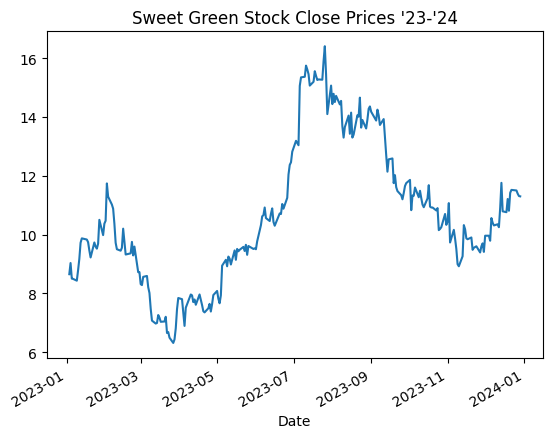

In [8]:
#historical data visualization
data['Close'].plot()
plt.title("Sweet Green Stock Close Prices '23-'24")
plt.show()

In [43]:
#starting technical indicators such as EMA and SMA
#here we calculate a 10 day-period and 50 day-period SMA of the closing price for Sweet Green stock
#A golden cross occurs when a security’s short-term SMA crosses above its long-term SMA. For example, the classic setup here is when the 50-day SMA crosses above the 200-day SMA. This is a bullish signal and indicates that the price of the security may continue rising. A golden cross can be used as a trading signal to enter a long trade.
#The reverse of the golden cross is a bearish indicator known as the death cross. A death cross is identified when a security’s short-term SMA crosses below its long-term SMA. For example, the 50-day SMA might cross over and fall under the 200-day SMA. This is a bearish signal and indicates that the price of the security may continue falling. A death cross may be used as an exit strategy.
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean() 

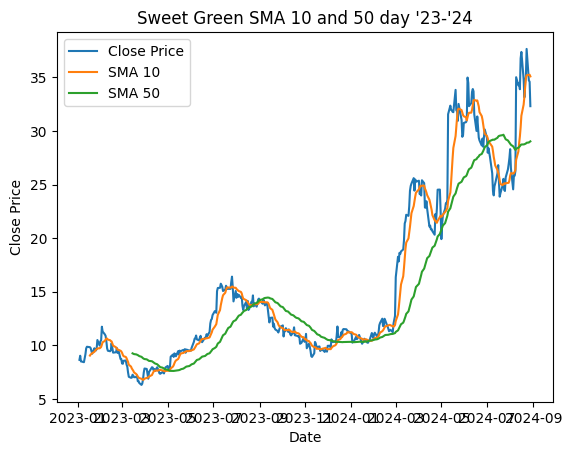

In [44]:
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_10'], label='SMA 10')
plt.plot(data['SMA_50'], label='SMA 50')
plt.title("Sweet Green SMA 10 and 50 day '23-'24")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [45]:
#now calculate EMA
data['EMA_10'] = data['Close'].ewm(span=10).mean()
data['EMA_50'] = data['Close'].ewm(span=50).mean()

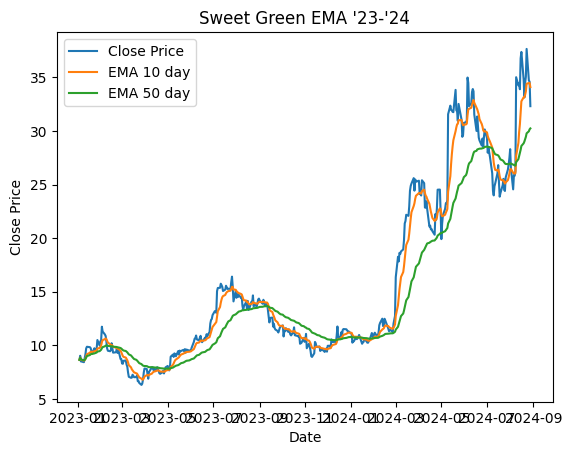

In [46]:
plt.plot(data['Close'], label='Close Price')
plt.plot(data['EMA_10'], label='EMA 10 day')
plt.plot(data['EMA_50'], label='EMA 50 day')
plt.title("Sweet Green EMA '23-'24")
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [53]:
#strategy to buy sweet green when its price is above the 10-day or 50-day SMA
# 1 is to buy and 0 is to hold stock or you can use true or false values
#results are in the sma cumulative results below where the sma 10 is 
data['Signal'] = np.where(data['Close'] > data['SMA_50'], 1, 0)
#data.info()
print(data[['Close','SMA_50','Signal']].to_string(index=False))
print(data)

    Close  SMA_50  Signal
 8.650000     NaN       0
 9.030000     NaN       0
 8.500000     NaN       0
 8.490000     NaN       0
 8.430000     NaN       0
 8.780000     NaN       0
 9.170000     NaN       0
 9.720000     NaN       0
 9.870000     NaN       0
 9.830000     NaN       0
 9.740000     NaN       0
 9.460000     NaN       0
 9.220000     NaN       0
 9.730000     NaN       0
 9.590000     NaN       0
 9.520000     NaN       0
 9.690000     NaN       0
10.500000     NaN       0
 9.980000     NaN       0
10.370000     NaN       0
10.470000     NaN       0
11.740000     NaN       0
11.290000     NaN       0
11.020000     NaN       0
10.880000     NaN       0
10.370000     NaN       0
 9.720000     NaN       0
 9.500000     NaN       0
 9.450000     NaN       0
 9.550000     NaN       0
10.200000     NaN       0
 9.770000     NaN       0
 9.320000     NaN       0
 9.360000     NaN       0
 9.750000     NaN       0
 9.290000     NaN       0
 9.590000     NaN       0
 8.720000   

In [56]:
#backtesting the strategy using daily returns and the cumulative returns 

# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Calculate strategy returns
data['Strategy_Return'] = data['Daily_Return'] * data['Signal'].shift(1) 

# Calculate strategy cumulative returns
data['Cumulative_Str_Return'] = (1 + data['Strategy_Return']).cumprod()
print(data)

                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2023-01-03   8.790000   9.005000   8.490000   8.650000   8.650000  1577200   
2023-01-04   8.840000   9.310000   8.680000   9.030000   9.030000  1474600   
2023-01-05   8.870000   8.960000   8.420000   8.500000   8.500000  1811600   
2023-01-06   8.570000   8.750000   7.810000   8.490000   8.490000  2643100   
2023-01-09   8.670000   8.820000   8.390000   8.430000   8.430000  1495200   
...               ...        ...        ...        ...        ...      ...   
2024-08-22  34.330002  36.285000  34.191002  35.060001  35.060001  3564700   
2024-08-23  35.509998  38.529999  35.430000  37.650002  37.650002  4846300   
2024-08-26  35.790001  36.650002  34.070000  34.709999  34.709999  5129600   
2024-08-27  34.180000  35.000000  33.500000  34.590000  34.590000  2057800   
2024-08-28  33.980000  34.290001  32.090000  32.310001  32.31000

In [39]:
#getting full historical data of Sweet Green stock
sg_data = yf.download('SG', start="2023-01-01", end="2024-08-29")

[*********************100%%**********************]  1 of 1 completed


In [57]:
#plot results of strategy, calculating daily returns and cumulative returns 
sg_data['Daily_Return'] = sg_data['Close'].pct_change()
# Calculate market cumulative returns
sg_data['Cumulative_Market_Return'] = (1 + sg_data['Daily_Return']).cumprod()
print(sg_data)

                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2024-01-02  11.080000  11.300000  10.870000  11.070000  11.070000  1346400   
2024-01-03  10.860000  10.920000  10.240000  10.250000  10.250000  1319400   
2024-01-04  10.180000  10.430000  10.060000  10.410000  10.410000  1410900   
2024-01-05  10.370000  10.950000  10.320000  10.380000  10.380000  1317000   
2024-01-08  10.420000  10.810000  10.324000  10.800000  10.800000  1067800   
...               ...        ...        ...        ...        ...      ...   
2024-08-22  34.330002  36.285000  34.191002  35.060001  35.060001  3564700   
2024-08-23  35.509998  38.529999  35.430000  37.650002  37.650002  4846300   
2024-08-26  35.790001  36.650002  34.070000  34.709999  34.709999  5129600   
2024-08-27  34.180000  35.000000  33.500000  34.590000  34.590000  2057800   
2024-08-28  33.980000  34.290001  32.090000  32.310001  32.31000

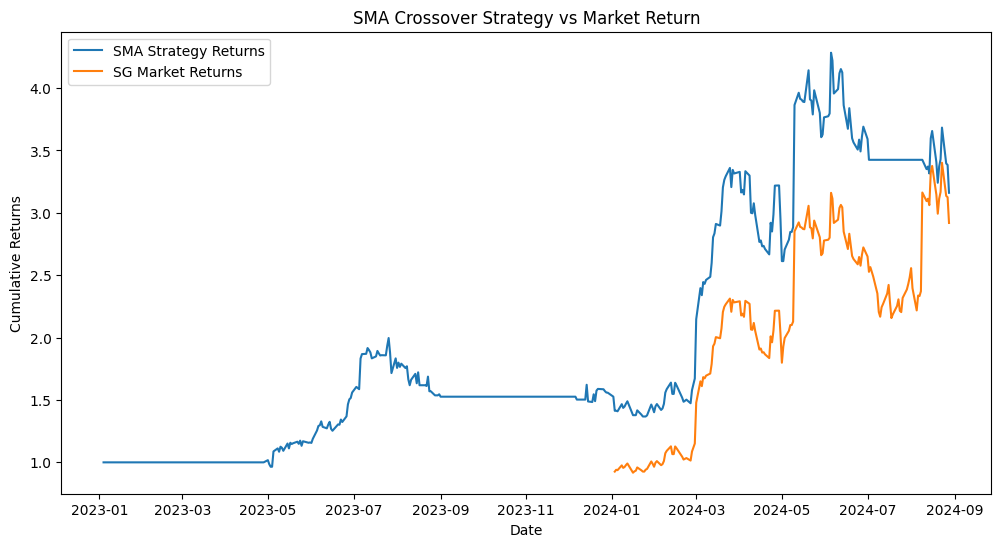

In [61]:
plt.figure(figsize=(12, 6)) 
plt.plot(data.index, data['Cumulative_Str_Return'], label='SMA Strategy Returns')
plt.plot(sg_data.index, sg_data['Cumulative_Market_Return'], label='SG Market Returns')
plt.title('SMA Crossover Strategy vs Market Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

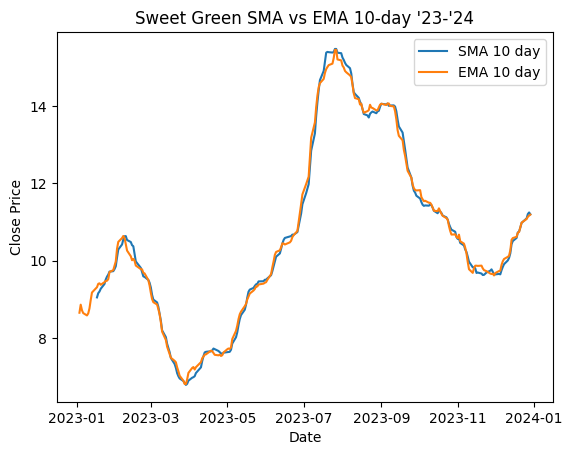

In [55]:
plt.plot(data['SMA_10'], label='SMA 10 day')
plt.plot(data['EMA_10'], label='EMA 10 day')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title("Sweet Green SMA vs EMA 10-day '23-'24")
plt.legend()
plt.show()

In [62]:
# Calculate Sharpe Ratio
#The Sharpe ratio is calculated by dividing the average strategy return by its standard deviation, then multiplying by the square root of 252 (the number of trading days in a year).
#A higher Sharpe ratio indicates that the strategy provides better returns for a given level of risk.
# f you can achieve a Sharpe ratio greater than 2 you are doing very well.
sharpe_ratio = data['Strategy_Return'].mean() / data['Strategy_Return'].std() * np.sqrt(252)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Sharpe Ratio: 1.46
